<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Neural Networks with TensorFlow

_Authors: Justin Pounders (ATL) and Riley Dalles (ATX)_

---

<a id="learning-objectives"></a>
### Learning Objectives
- Describe the basic `tensorflow` workflow.
- Create computational graphs representing basic feed-forward neural networks.
- Train neural networks using `tensorflow`
- Create and train neural networks for both regression and classification

In [4]:
import tensorflow as tf

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


## Computational Graphs

---

Tensorflow is fundamentally a library for creating **computational graphs**.

![](assets/comp_graph.png)

Let's define and evaluate this "computational graph."

**There are two phases to building a `tensorflow` model.**

1. Graph construction
2. Training/evaluation

In [7]:
# Build the graph

a = tf.Variable(3, name='a')
b = tf.Variable(4, name='a')
c = a + b
d = b + 1
e = c * d

In [8]:
# Evaluate the graph

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = e.eval()
    print(result)

35


## Building a Neural Network for Regression

---

Let's start by building a neural net for _regression_.  These are the steps we will follow:

1. Load the data.
2. Data cleaning/munging, feature engineering (will not do today)
3. Make test/train splits. (Should we use cross validation?)
4. Standardize the data.
5. Build the computational graph for the neural network.
6. Train the network using gradient descent a.k.a. back propogation.
7. Evaluate performance and iterate.

### Steps 1-4

In [9]:
from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing

data = load_boston()
data = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Step 5: Build the network

In [10]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, 
                   shape=(None,X_train.shape[1]),
                   name='X')
y = tf.placeholder(dtype=tf.float32,
                   shape=(None),
                   name='y')

hidden1 = tf.layers.dense(X, units=13, 
                          name='hidden1',
                          activation=tf.nn.relu)
y_hat = tf.layers.dense(hidden1, 
                        units=1,
                        activation=None)
#Compile/Give the NN the params
loss = tf.losses.mean_squared_error(y, y_hat)

optimizer = tf.train.AdamOptimizer(0.01)

training_op = optimizer.minimize(loss)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


### Step 6: Train the network

In [11]:
init = tf.global_variables_initializer()

test_err = []
train_err = []

with tf.Session() as sess:
    init.run()
    
    for epoch in range(500):
        sess.run(training_op, 
                 feed_dict={X:X_train, y:y_train})
        train_loss = sess.run(loss, feed_dict={X:X_train, y:y_train})
        test_loss = sess.run(loss, feed_dict={X:X_test, y:y_test})
        test_err.append(test_loss)
        train_err.append(train_loss)
        if epoch % 10 == 0:
            print('epoch', epoch+1, train_loss, test_loss)
        
    pred = sess.run(y_hat, feed_dict={X:X_test})

epoch 1 6.1775336 6.214623
epoch 11 3.1273718 3.1804585
epoch 21 1.5643479 1.5914989
epoch 31 0.8896535 0.8996698
epoch 41 0.8391979 0.8463941
epoch 51 0.7544851 0.7573671
epoch 61 0.7003765 0.705764
epoch 71 0.6645537 0.6698278
epoch 81 0.6285049 0.63248754
epoch 91 0.5995898 0.604303
epoch 101 0.5726888 0.57822216
epoch 111 0.54888606 0.5553244
epoch 121 0.5280183 0.535616
epoch 131 0.5102843 0.51884896
epoch 141 0.49628478 0.5048721
epoch 151 0.48465896 0.49300864
epoch 161 0.4741679 0.48259115
epoch 171 0.46536556 0.47333577
epoch 181 0.45758405 0.46472934
epoch 191 0.4506636 0.45700598
epoch 201 0.44445056 0.4498962
epoch 211 0.4387096 0.44360086
epoch 221 0.43336928 0.43779334
epoch 231 0.4284717 0.43245652
epoch 241 0.4240643 0.42759755
epoch 251 0.4201078 0.4232949
epoch 261 0.41661304 0.41953465
epoch 271 0.41351935 0.4162162
epoch 281 0.4107517 0.41319054
epoch 291 0.40813637 0.41038543
epoch 301 0.4055018 0.40742737
epoch 311 0.40261918 0.40426266
epoch 321 0.39997262 0.4013

In [12]:
metrics.r2_score(y_test, pred)

0.7163268239056209

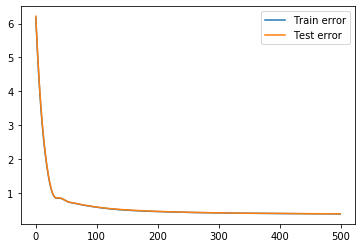

In [13]:
plt.plot(train_err, label='Train error')
plt.plot(test_err, label='Test error')
plt.legend()

## Building a Neural Network for Binary Classification

---

Now we'll build a neural net for _classification_.  We will follow the same steps as for regression:

1. Load the data.
2. Data cleaning/munging, feature engineering (will not do today)
3. Make test/train splits. (Should we use cross validation?)
4. Standardize the data.
5. Build the computational graph for the neural network.
6. Train the network using gradient descent a.k.a. back propogation.
7. Evaluate performance and iterate.

In [14]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

# 1 = benign
# 0 = malignant

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

y_train = y_train*-1 + 1
y_test = y_test*-1 + 1

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [15]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, 
                   shape=(None,X_train.shape[1]),
                   name='X')
y = tf.placeholder(dtype=tf.float32,
                   shape=(None),
                   name='y')

hidden1 = tf.layers.dense(X, units=y_train.shape[1],
                          name='hidden1',
                          activation=tf.nn.relu)
y_hat = tf.layers.dense(hidden1, units=1,
                        name='y_hat',
                        activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)

optimizer = tf.train.AdamOptimizer(0.01)

training_op = optimizer.minimize(loss)

In [16]:
init = tf.global_variables_initializer()

test_err = []
train_err = []

with tf.Session() as sess:
    init.run()
    
    for epoch in range(501):
        sess.run(training_op,
                     feed_dict={X:X_train, y:y_train})
        
        train_loss = sess.run(loss, feed_dict={X:X_train, y:y_train})
        test_loss = sess.run(loss, feed_dict={X:X_test, y:y_test})
        test_err.append(test_loss)
        train_err.append(train_loss)
        if epoch % 10 == 0:
            print('epoch', epoch+1, train_loss, test_loss)
        
    pred = sess.run(y_hat, feed_dict={X:X_test})

epoch 1 0.75808066 0.77088714
epoch 11 0.5708905 0.59203786
epoch 21 0.471998 0.48509642
epoch 31 0.41148642 0.42095616
epoch 41 0.37031952 0.37916934
epoch 51 0.33758605 0.34847015
epoch 61 0.3096459 0.32236832
epoch 71 0.28543225 0.29991257
epoch 81 0.26426834 0.28122944
epoch 91 0.24542682 0.26520512
epoch 101 0.22861008 0.25107497
epoch 111 0.21355765 0.23902299
epoch 121 0.20003463 0.22842215
epoch 131 0.18780631 0.2192037
epoch 141 0.17671452 0.21141917
epoch 151 0.16661827 0.204821
epoch 161 0.15741652 0.19913073
epoch 171 0.14901689 0.19416408
epoch 181 0.14132443 0.19008847
epoch 191 0.13426107 0.18676624
epoch 201 0.12775724 0.18405557
epoch 211 0.121752895 0.1820126
epoch 221 0.116195194 0.18048276
epoch 231 0.11103828 0.17943026
epoch 241 0.1062426 0.17882787
epoch 251 0.10177759 0.17803682
epoch 261 0.097613126 0.1776829
epoch 271 0.09372121 0.17720872
epoch 281 0.09007858 0.17680483
epoch 291 0.08666501 0.17669159
epoch 301 0.08346234 0.17665653
epoch 311 0.08045396 0.177

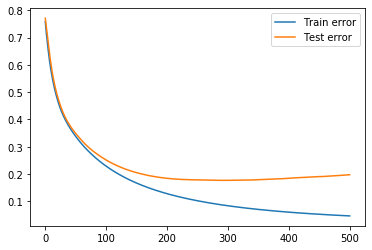

In [17]:
plt.plot(train_err, label='Train error')
plt.plot(test_err, label='Test error')
plt.legend()

Before moving on, let's go back and add a new hidden layer to our network...

### Batching the input

What if we can't store all of the training data in memory?

We can split the data up into "batches" and feed them to the network one at a time.

In [18]:
kf = KFold(n_splits=2, shuffle=True, random_state=42)

batches = [test for test, _ in kf.split(X_train, y_train)]

In [19]:
init = tf.global_variables_initializer()

test_err = []
train_err = []

with tf.Session() as sess:
    init.run()
    
    for epoch in range(101):
        for batch in batches:
            X_batch = X_train[batch]
            y_batch = y_train[batch]
            sess.run(training_op,
                     feed_dict={X:X_batch, y:y_batch})
        
        train_loss = sess.run(loss, feed_dict={X:X_train, y:y_train})
        test_loss = sess.run(loss, feed_dict={X:X_test, y:y_test})
        test_err.append(test_loss)
        train_err.append(train_loss)
        if epoch % 10 == 0:
            print('epoch', epoch+1, train_loss, test_loss)
        
    pred = sess.run(y_hat, feed_dict={X:X_test})

epoch 1 0.6850874 0.6864927
epoch 11 0.5161634 0.5397416
epoch 21 0.39217487 0.43254957
epoch 31 0.32173106 0.3651887
epoch 41 0.2675959 0.30801123
epoch 51 0.23024227 0.26593792
epoch 61 0.19728005 0.23365709
epoch 71 0.17275992 0.21142922
epoch 81 0.1531157 0.19358517
epoch 91 0.13705593 0.1794667
epoch 101 0.122970715 0.16724941


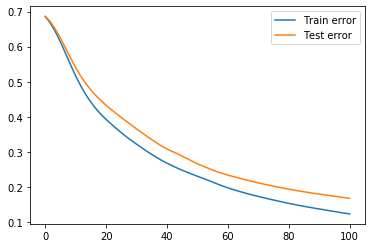

In [20]:
plt.plot(train_err, label='Train error')
plt.plot(test_err, label='Test error')
plt.legend()

In [53]:
pred_bin = (pred > 0.5).astype(int)

In [54]:
metrics.accuracy_score(y_test, pred_bin)

0.972027972027972

In [55]:
metrics.confusion_matrix(y_test, pred_bin)

array([[80,  2],
       [ 2, 59]])

## Building a Neural Network for Multi-Class Classification

---

In [21]:
from sklearn.datasets import load_iris
import pandas as pd

In [22]:
data = load_iris()

y = data.target
y = pd.get_dummies(y).values

X_train, X_test, y_train, y_test = train_test_split(data.data, y)


ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [41]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, 
                   shape=(None,X_train.shape[1]),
                   name='X')
y = tf.placeholder(dtype=tf.float32,
                   shape=(None),
                   name='y')

hidden1 = tf.layers.dense(X, units=X_train.shape[1], 
                          name='hidden1',
                          activation=tf.nn.relu)
y_hat = tf.layers.dense(hidden1, 
                        units=y_train.shape[1],
                        activation=None)

loss = tf.losses.softmax_cross_entropy(y, y_hat)

optimizer = tf.train.AdamOptimizer(0.01)

training_op = optimizer.minimize(loss)

saver = tf.train.Saver()

In [42]:
init = tf.global_variables_initializer()

test_err = []
train_err = []

with tf.Session() as sess:
    init.run()
    
    for epoch in range(501):
        sess.run(training_op,
                 feed_dict={X:X_train, y:y_train})
        
        train_loss = sess.run(loss, feed_dict={X:X_train, y:y_train})
        test_loss = sess.run(loss, feed_dict={X:X_test, y:y_test})
        test_err.append(test_loss)
        train_err.append(train_loss)
        if epoch % 10 == 0:
            print('epoch', epoch+1, train_loss, test_loss)
            
    saver.save(sess, './iris.ckpt')
        
    pred = sess.run(y_hat, feed_dict={X:X_test})

epoch 1 1.055986 1.1455314
epoch 11 0.8743173 0.9328565
epoch 21 0.69764715 0.77531767
epoch 31 0.5406632 0.6198665
epoch 41 0.4217369 0.48402515
epoch 51 0.33580488 0.38903293
epoch 61 0.27514824 0.32050118
epoch 71 0.22704796 0.26541728
epoch 81 0.18876393 0.21954581
epoch 91 0.15945064 0.18342614
epoch 101 0.13651808 0.15603478
epoch 111 0.119069174 0.13615069
epoch 121 0.106029965 0.11916291
epoch 131 0.09689738 0.106582865
epoch 141 0.089686856 0.09672151
epoch 151 0.083911315 0.088511996
epoch 161 0.07918339 0.08206173
epoch 171 0.075255446 0.07668066
epoch 181 0.071939275 0.07224007
epoch 191 0.069103755 0.06850023
epoch 201 0.06670962 0.065235965
epoch 211 0.06464308 0.062243864
epoch 221 0.06284601 0.059610274
epoch 231 0.061273064 0.05725705
epoch 241 0.059895735 0.05509268
epoch 251 0.058676567 0.053228553
epoch 261 0.05758671 0.051518053
epoch 271 0.05660487 0.05000378
epoch 281 0.05571609 0.048619326
epoch 291 0.05490785 0.047358435
epoch 301 0.05416896 0.046211448
epoch 3

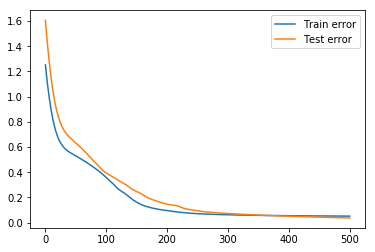

In [34]:
plt.plot(train_err, label='Train error')
plt.plot(test_err, label='Test error')
plt.legend()

In [40]:
pred[0], y_test[0]

(array([-4.22811 ,  4.44836 , -1.166159], dtype=float32),
 array([0, 1, 0], dtype=uint8))

## Saving Your Model

---

In [46]:
with tf.Session() as sess:
    saver.restore(sess, './iris.ckpt')
    pred = sess.run(y_hat, feed_dict={X:X_test})
    
pred

INFO:tensorflow:Restoring parameters from ./iris.ckpt


array([[ -4.5962763 ,   2.3085513 ,  -5.2152634 ],
       [ -0.64348024,   3.423298  ,  -7.242627  ],
       [ -9.136091  ,  -5.1863213 ,   1.7965195 ],
       [ -9.518849  ,  -0.44511986,   0.5633383 ],
       [ -3.967315  ,   2.815835  ,  -1.4160478 ],
       [ -5.115718  ,   2.3342774 ,  -1.4199467 ],
       [  5.8419304 ,  -4.032305  ,  -5.958152  ],
       [  5.4483643 ,  -4.6990013 ,  -4.721398  ],
       [-12.362675  ,  -7.1672726 ,   3.302871  ],
       [ -9.64221   ,  -3.761366  ,   1.8003299 ],
       [  6.144955  ,  -2.6360006 ,  -7.734229  ],
       [ -8.683875  ,  -1.5458021 ,   0.8955207 ],
       [ -6.074457  ,   2.5636206 ,  -1.4820247 ],
       [-11.394483  ,  -5.579601  ,   2.6292999 ],
       [ -6.1747317 ,   4.3757405 ,  -1.5180924 ],
       [-11.9856205 ,  -5.2234306 ,   2.5505288 ],
       [  5.9409046 ,  -3.881341  ,  -6.2535925 ],
       [ -8.41814   ,  -0.29515314,  -1.2205696 ],
       [ -4.0736866 ,   3.271796  ,  -4.797303  ],
       [  6.144955  ,  -2.63600

In [56]:
class_preds = np.empty(pred.shape[0], dtype=np.int32)
for i,clas in enumerate(map(np.argmax, pred)):
    class_preds[i] = clas
    
class_preds

array([1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 2, 1,
       2, 2, 1, 0, 0, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2], dtype=int32)